<a href="https://colab.research.google.com/github/redpony/seaml_intro_nns/blob/master/01_xor_using_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tf.compat.v2.enable_v2_behavior()

# Point of this Notebook

 * See example of autodiff in TF 2.0
 * See engineering benefits of it compared to writing gradients yourself

# Same XOR Data

In [0]:
X = np.array([[-1., -1.],
              [-1., 1.],
              [1., -1.],
              [1., 1.]])
y = np.array([[-1.],
              [1.],
              [1.],
              [-1.]])
ETA = 0.15  # learning rate for SGD
EPOCHS = 35

# MLP Code

 * Note just have the forward declaration
 * Exercise: change to `tanh`
 * Exercise: change to built-in optimizers in `tf.keras.optimizers`

Predictions after training:
[[-1.        ]
 [ 0.99999999]
 [ 1.        ]
 [-0.99999999]]


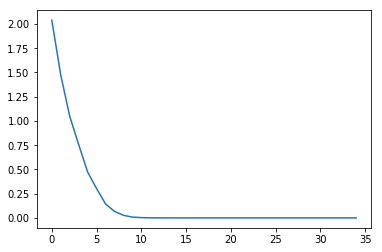

In [4]:
HIDDEN = 32

# use tf.Variable to declare things we will differentiate with respect to
W = tf.Variable(np.random.normal(size=(2, HIDDEN)) / np.sqrt(HIDDEN))
a = tf.Variable(np.zeros(shape=(HIDDEN, )))
V = tf.Variable(np.random.normal(size=(HIDDEN, 1)) / np.sqrt(HIDDEN))

mlp_losses = []

for _ in range(EPOCHS):
    # instantiate the tape that will be used to record operations
    with tf.GradientTape() as tape:
        p = X @ W + a
        h = tf.nn.relu(p)
        y_pred = h @ V
        loss = 0.5 * tf.reduce_sum((y_pred - y)**2)
    mlp_losses.append(loss)
    gW, ga, gV = tape.gradient(loss, sources=[W, a, V])
    
    W.assign_sub(ETA * gW)  # Can't write W -= ETA * gW (who knows why)
    a.assign_sub(ETA * ga)
    V.assign_sub(ETA * gV)

print("Predictions after training:\n{}".format(y_pred))
plt.plot(mlp_losses)